# Environment preparing
Download data, unzip data

Creat environment and mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Change dir to workspace

In [0]:
import os
os.chdir("/content/drive/My Drive/RM")
!ls

researchmethod_classification.ipynb


Download dataset into this directory

In [0]:
os.chdir("dataset")
!ls

install kaggle and download dataset

https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl#scrollTo=0hyJ4Rb5HMwH

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuanrun","key":"6223f9633f37ca6a938961c82d8b3747"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw------- 1 root root 63 Oct  5 10:38 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle datasets list

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 11.7MB/s]
 97% 264M/271M [00:02<00:00, 112MB/s]
100% 271M/271M [00:02<00:00, 108MB/s]
 98% 533M/543M [00:05<00:00, 119MB/s]
100% 543M/543M [00:05<00:00, 98.5MB/s]


Unzip the dataset

In [0]:
import os
os.chdir("/content/drive/My Drive/RM")
!ls

kaggle.json			     sampleSubmission.csv  train.zip
researchmethod_classification.ipynb  test1.zip


In [0]:
import zipfile
# for file in os.listdir():
file1 = "/content/drive/My Drive/RM/train.zip"
file2 = "/content/drive/My Drive/RM/test1.zip"
zip_ref = zipfile.ZipFile(file1, 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile(file2, 'r')
zip_ref.extractall()
zip_ref.close()

-------------------------------------------------------------------
Data prepare finish.

In [0]:
os.chdir("/content/drive/My Drive")
!git clone https://github.com/dipanjanS/hands-on-transfer-learning-with-python.git

Cloning into 'hands-on-transfer-learning-with-python'...
remote: Enumerating objects: 184, done.
remote: Total 184 (delta 0), reused 0 (delta 0), pack-reused 184
Receiving objects: 100% (184/184), 38.33 MiB | 17.67 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Checking out files: 100% (112/112), done.


In [0]:
import shutil

shutil.move("/content/drive/My Drive/hands-on-transfer-learning-with-python/notebooks/Ch05 - Unleash the Power of Transfer Learning", "/content/drive/My Drive/RM")

'/content/drive/My Drive/RM/Ch05 - Unleash the Power of Transfer Learning'

# RM-experiments

In [2]:
import os
os.chdir("/content/drive/My Drive/RM")
!ls

 cats_dogs_cnn_img_aug.h5			  sampleSubmission.csv
 cats_dogs_tlearn_basicVGG_cnn.h5		  test1
 cats_dogs_tlearn_VGG16_img_aug_cnn.h5		  test1.zip
'Ch05 - Unleash the Power of Transfer Learning'   test_data
 kaggle.json					  train
 logs						  training_data
 model_evaluation_utils.py			  train.zip
 __pycache__					  utils.py
 researchmethod_classification.ipynb		  validation_data


# 1. Building small Datasets
Only once

import libraries

In [0]:
import glob
import numpy as np
import os
import shutil
from utils import log_progress

np.random.seed(42)

Index to dataset

In [0]:
files = glob.glob('/content/drive/My Drive/RM/train/*')

In [0]:
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

缩小训练集

In [0]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


保存小样本训练集到对应的目录

In [0]:
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in log_progress(train_files, name='Training Images'):
    shutil.copy(fn, train_dir)

for fn in log_progress(validate_files, name='Validation Images'):
    shutil.copy(fn, val_dir)
    
for fn in log_progress(test_files, name='Test Images'):
    shutil.copy(fn, test_dir)

# 2. Preparing Datasets

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


convert 0-255 to 0-1

In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


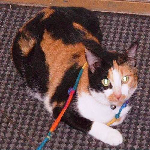

In [0]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [0]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


# Build our CNN model

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
____________________

Draw NN diagram

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

create callbacks

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-customise-model-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

Model 1 - customised model

In [0]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard])


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
 120/3000 [>.............................] - ETA: 1:04 - loss: 1.1418 - acc: 0.4500

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128615). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


3000/3000 [==============================] - 11s 4ms/step - loss: 0.6961 - acc: 0.5623 - val_loss: 0.6331 - val_acc: 0.6530
Epoch 2/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.6125 - acc: 0.6540 - val_loss: 0.5885 - val_acc: 0.6920
Epoch 3/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.5523 - acc: 0.7240 - val_loss: 0.5641 - val_acc: 0.7020
Epoch 4/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.5093 - acc: 0.7513 - val_loss: 0.5487 - val_acc: 0.7160
Epoch 5/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4697 - acc: 0.7883 - val_loss: 0.5930 - val_acc: 0.6800
Epoch 6/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4307 - acc: 0.8077 - val_loss: 0.5433 - val_acc: 0.7240
Epoch 7/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3899 - acc: 0.8293 - val_loss: 0.5711 - val_acc: 0.7150
Epoch 8/30
3000/3000 [==============================] - 9s 3ms/step - lo

In [0]:
import os
os.chdir("/content/drive/My Drive/RM/logs")
!ls

Catdog-customise-model-1005111204


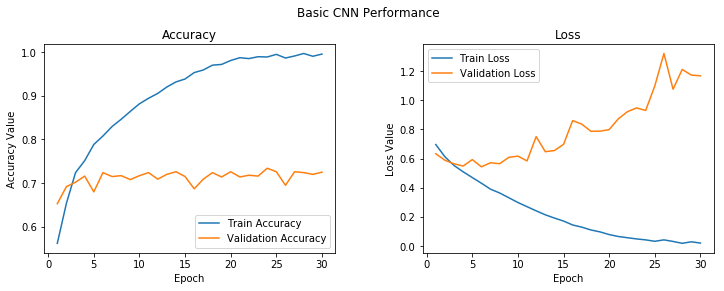

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

**Model-one more layer-dropout 0.3**

Model with: CNN Model with Regularization
Let’s improve upon our base CNN model by adding in one more convolution layer, another dense hidden layer. Besides this, we will add dropout of 0.3 after each hidden dense layer to enable regularization.

In [0]:

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_____

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-customise-model-dropout03-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [0]:
history = model.fit(x=train_imgs_scaled,
          y=train_labels_enc,
          validation_data=(validation_imgs_scaled, validation_labels_enc),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[tensorboard])

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.6905 - acc: 0.5383 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6701 - acc: 0.5863 - val_loss: 0.6482 - val_acc: 0.6380
Epoch 3/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6462 - acc: 0.6257 - val_loss: 0.6243 - val_acc: 0.6510
Epoch 4/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6209 - acc: 0.6553 - val_loss: 0.6441 - val_acc: 0.6130
Epoch 5/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5902 - acc: 0.6863 - val_loss: 0.5815 - val_acc: 0.6810
Epoch 6/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5480 - acc: 0.7217 - val_loss: 0.5633 - val_acc: 0.7090
Epoch 7/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5248 - acc: 0.7367 - val_loss: 0.6017 - val_acc: 0.6840
Epoch 8/30
300

# CNN Model with Image Augmentation

In [5]:
import os
os.chdir("/content/drive/My Drive/RM")
!ls

 basic_CNN_arc.png				  sampleSubmission.csv
 cats_dogs_cnn_img_aug.h5			  test1
 cats_dogs_tlearn_basicVGG_cnn.h5		  test1.zip
 cats_dogs_tlearn_VGG16_img_aug_cnn.h5		  test_data
 cats_dogs_tlearn_VGG19_img_aug_cnn.h5		  train
'Ch05 - Unleash the Power of Transfer Learning'   training_data
 kaggle.json					  train.zip
 logs						  utils.py
 model_evaluation_utils.py			  validation_data
 __pycache__					  VGG16_basic_arc.png
 researchmethod_classification.ipynb		  VGG19_basic_arc.png


In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.


In [5]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['dog', 'dog', 'dog', 'dog', 'dog'] [1 1 1 1 1]


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  zoom_range=0.3,
                  rotation_range=50,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2, 
                  horizontal_flip=True,
                  fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


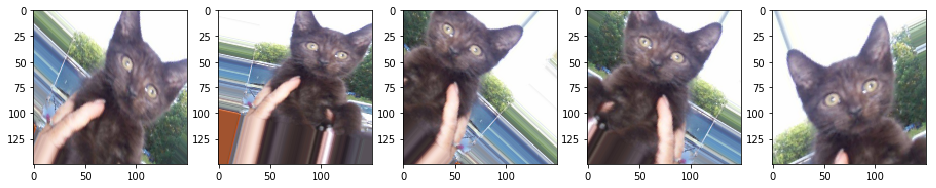

In [16]:
img_id = 2019
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                  train_labels[img_id:img_id+1],
                  batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


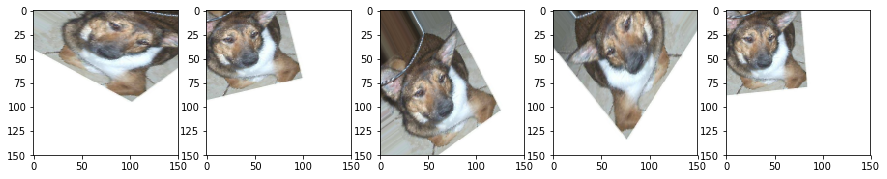

In [18]:
img_id = 1888
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                  train_labels[img_id:img_id+1],
                  batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [0]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
____________________________________

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [0]:
import IPython
import keras
keras.utils.plot_model(model, to_file='basic_CNN_arc.png', show_shapes=True)
IPython.display.Image('basic_CNN_arc.png')

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-customise-model-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [0]:
history = model.fit_generator(train_generator,
                steps_per_epoch=100, 
                epochs=100,
                validation_data=val_generator, 
                validation_steps=50, 
                verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
  5/100 [>.............................] - ETA: 2:39 - loss: 0.6957 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.146116). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


100/100 [==============================] - 25s 251ms/step - loss: 0.6935 - acc: 0.5227 - val_loss: 0.6931 - val_acc: 0.5030
Epoch 2/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6773 - acc: 0.5783 - val_loss: 0.6717 - val_acc: 0.5720
Epoch 3/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6609 - acc: 0.6010 - val_loss: 0.6747 - val_acc: 0.5540
Epoch 4/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6517 - acc: 0.6067 - val_loss: 0.6963 - val_acc: 0.5330
Epoch 5/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6404 - acc: 0.6340 - val_loss: 0.6373 - val_acc: 0.6190
Epoch 6/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6347 - acc: 0.6357 - val_loss: 0.6493 - val_acc: 0.5970
Epoch 7/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6259 - acc: 0.6377 - val_loss: 0.6595 - val_acc: 0.6020
Epoch 8/100
100/100 [==============================] - 19s 1

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Customised CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_cnn_img_aug.h5')

# Pre-trained CNN Models - VGG16

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline 

Using TensorFlow backend.


In [6]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [8]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['dog', 'dog', 'dog', 'dog', 'dog'] [1 1 1 1 1]


In [9]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
          input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()





58892288/58889256 [==============================] - 1s 0us/step


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________

In [10]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f01d007b3c8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f01d007b860>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f01d007b710>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f01d007be80>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f01cf0af898>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f01cf0e05f8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f01cf07b978>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f01cf07b208>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f01cf0a8470>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f01cf0a8e48>,block3_conv3,False


In [11]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


Bottle feature looks like:

(1, 4, 4, 512)


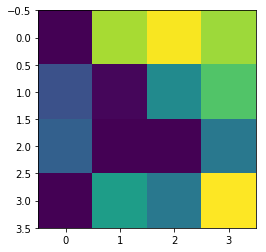

In [0]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [0]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [13]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model1 = Sequential()
model1.add(vgg)
model1.add(Dense(512, activation='relu', input_dim=input_shape))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 4, 4, 512)         262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 4, 4, 512)         262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
dense_6 (Dense)              (None, 4, 4, 1)           513       
Total params: 15,240,513
Trainable params: 525,825
Non-trainable params: 14,714,688
____________________________________

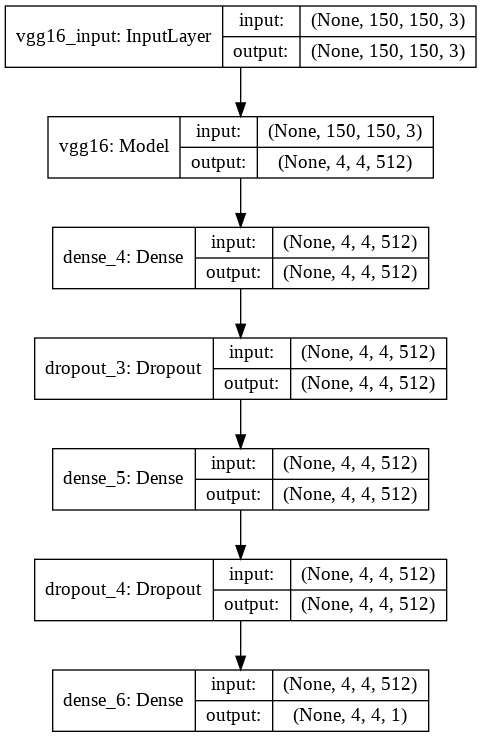

In [35]:
import IPython
import keras
keras.utils.plot_model(model1, to_file='VGG16_basic_arc.png', show_shapes=True)
IPython.display.Image('VGG16_basic_arc.png')

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg16-model-FreezeBase-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [0]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard])

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 2s 550us/step - loss: 0.4404 - acc: 0.7840 - val_loss: 0.2868 - val_acc: 0.8790
Epoch 2/30
3000/3000 [==============================] - 1s 394us/step - loss: 0.2897 - acc: 0.8747 - val_loss: 0.2676 - val_acc: 0.8790
Epoch 3/30
3000/3000 [==============================] - 1s 385us/step - loss: 0.2339 - acc: 0.9013 - val_loss: 0.2619 - val_acc: 0.8890
Epoch 4/30
3000/3000 [==============================] - 1s 406us/step - loss: 0.2036 - acc: 0.9163 - val_loss: 0.2167 - val_acc: 0.9100
Epoch 5/30
3000/3000 [==============================] - 1s 388us/step - loss: 0.1694 - acc: 0.9333 - val_loss: 0.2337 - val_acc: 0.9090
Epoch 6/30
3000/3000 [==============================] - 1s 403us/step - loss: 0.1438 - acc: 0.9453 - val_loss: 0.2254 - val_acc: 0.9160
Epoch 7/30
3000/3000 [==============================] - 1s 430us/step - loss: 0.1158 - acc: 0.9553 - val_loss: 0.2308 - val_acc: 0.9150


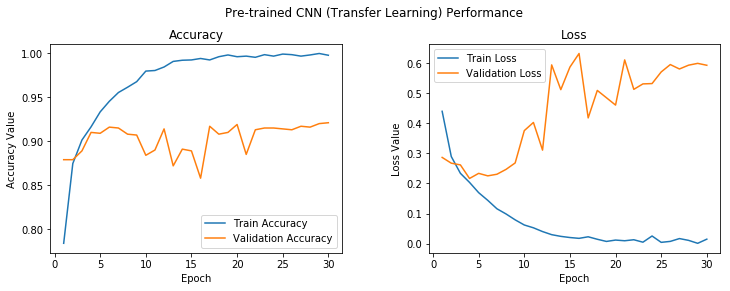

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_basicVGG_cnn.h5')

# Pre-trained VGG16 model as a Feature Extractor with Image Augmentation

lr=2e-5

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [0]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg16-model-FreezeBase-Augmentation-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [0]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6625 - acc: 0.5980 - val_loss: 0.5117 - val_acc: 0.7970
Epoch 2/100
100/100 [==============================] - 29s 294ms/step - loss: 0.5623 - acc: 0.7057 - val_loss: 0.4229 - val_acc: 0.8380
Epoch 3/100
100/100 [==============================] - 29s 292ms/step - loss: 0.5140 - acc: 0.7483 - val_loss: 0.3637 - val_acc: 0.8490
Epoch 4/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4768 - acc: 0.7737 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4577 - acc: 0.7853 - val_loss: 0.3058 - val_acc: 0.8840
Epoch 6/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4333 - acc: 0.8090 - val_loss: 0.2963 - val_acc: 0.8850
Epoch 7/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4256 - acc: 0.8077 - val_loss: 0.2830 - val_acc: 0.8900
Epoch 8/100
100/100 [===========================

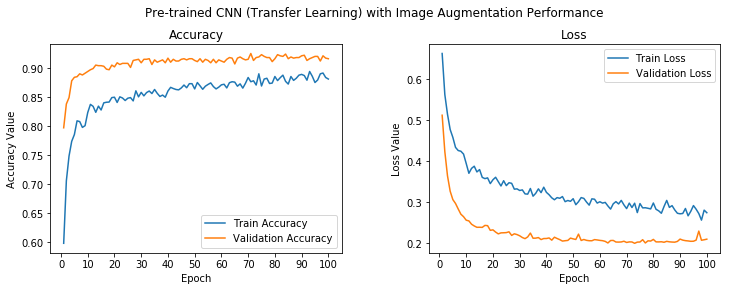

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG16_img_aug_cnn.h5')

# Pre-trained VGG19 model as a Feature Extractor with Image Augmentation

lr=2e-5

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [38]:
from keras.applications import vgg19
from keras.models import Model
import keras

vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
          input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
____________________________________________________________

In [39]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fd189f1cd68>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7fd189f1ce48>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fd189f1cfd0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fd189ebdac8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fd189ebd2e8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fd189ee3400>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fd1895b6588>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fd1895b64e0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fd1895e36d8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fd18947ba20>,block3_conv3,False


In [0]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [42]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [43]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model1 = Sequential()
model1.add(vgg)
model1.add(Dense(512, activation='relu', input_dim=input_shape))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
dense_7 (Dense)              (None, 4, 4, 512)         262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
dense_8 (Dense)              (None, 4, 4, 512)         262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
dense_9 (Dense)              (None, 4, 4, 1)           513       
Total params: 20,550,209
Trainable params: 525,825
Non-trainable params: 20,024,384
____________________________________

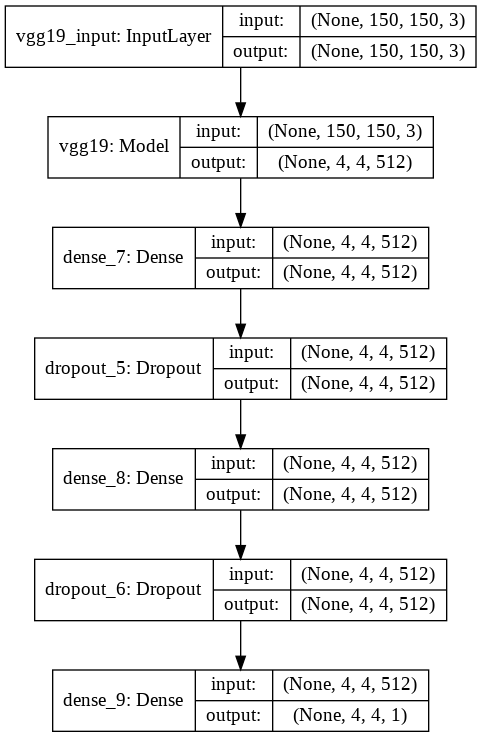

In [44]:
import IPython
import keras
keras.utils.plot_model(model1, to_file='VGG19_basic_arc.png', show_shapes=True)
IPython.display.Image('VGG19_basic_arc.png')

In [45]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              20024384  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 24,482,369
Trainable params: 4,457,985
Non-trainable params: 20,024,384
__________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg19-model-FreezeBase-Augmentation-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [47]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 39s 393ms/step - loss: 0.6764 - acc: 0.5893 - val_loss: 0.5350 - val_acc: 0.7900
Epoch 2/100
100/100 [==============================] - 34s 336ms/step - loss: 0.5981 - acc: 0.6803 - val_loss: 0.4560 - val_acc: 0.8100
Epoch 3/100
100/100 [==============================] - 34s 337ms/step - loss: 0.5541 - acc: 0.7170 - val_loss: 0.4030 - val_acc: 0.8370
Epoch 4/100
100/100 [==============================] - 34s 337ms/step - loss: 0.5212 - acc: 0.7403 - val_loss: 0.3712 - val_acc: 0.8410
Epoch 5/100
100/100 [==============================] - 34s 337ms/step - loss: 0.4997 - acc: 0.7470 - val_loss: 0.3536 - val_acc: 0.8490
Epoch 6/100
100/100 [==============================] - 34s 337ms/step - loss: 0.4782 - acc: 0.7703 - val_loss: 0.3379 - val_acc: 0.8550
Epoch 7/100
100/100 [==============================] - 34s 337ms/step - loss: 0.4690 - acc: 0.7830 - val_loss: 0.3272 - val_acc: 0.8610
Epoch 8/100
100/100 [===========================

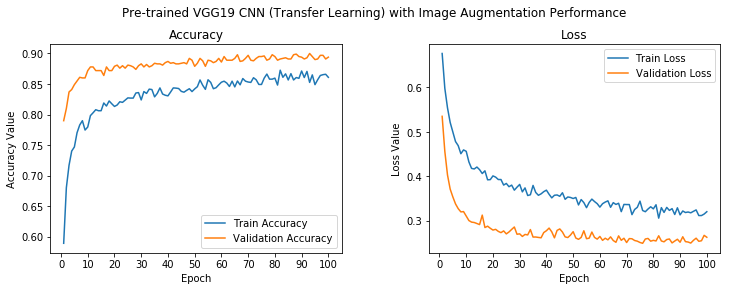

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained VGG19 CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG19_img_aug_cnn.h5')

# Previous works

Method 1: Keras CNN

https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/content/drive/My Drive/Transfer-Learning/TransferLearning-classification/dataset"))

['train', 'test1', '.ipynb_checkpoints']


Define Constants

In [0]:
DATA_DIR = "/content/drive/My Drive/Transfer-Learning/TransferLearning-classification/dataset"
TRAIN_DIR = "/content/drive/My Drive/Transfer-Learning/TransferLearning-classification/dataset/train"
TEST_DIR = "/content/drive/My Drive/Transfer-Learning/TransferLearning-classification/dataset/test1"
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

Prepare Training Data

(1) Read train data and label pics

In [0]:
filenames = os.listdir(TRAIN_DIR)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

view a random pic in the data

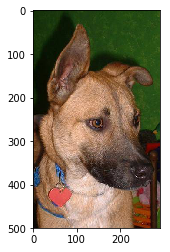

In [0]:
sample = random.choice(filenames)
image = load_img(os.path.join(TRAIN_DIR, sample))
plt.imshow(image)

Buile model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# BatchNormalization()
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Callbacks

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reaction = ReduceLROnPlateau(monitor='val_acc',
                        patience=2,
                        verbose=1,
                        factor=0.5,
                        min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reaction]

Prepare data

In [0]:
df['category'] = df['category'].replace({0: 'cat', 1:'dog'})

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [0]:
train_df['category'].value_counts()

dog    10015
cat     9985
Name: category, dtype: int64

In [0]:
validate_df['category'].value_counts()

cat    2515
dog    2485
Name: category, dtype: int64

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

**Training Generator**

In [0]:
train_df.head()

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat


In [0]:
validate_df.head()

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog


In [0]:
train_datagen = ImageDataGenerator(
                rotation_range=15,
                rescale=1./255,
                shear_range=0.1,
                zoom_range=0.2,
                horizontal_flip=True,
                width_shift_range=0.1,
                height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    TRAIN_DIR,
                    x_col='filename',
                    y_col='category',
                    target_size=IMAGE_SIZE,
                    class_mode='categorical',
                    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                    validate_df, 
                    TRAIN_DIR, 
                    x_col='filename',
                    y_col='category',
                    target_size=IMAGE_SIZE,
                    class_mode='categorical',
                    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


Example generator

In [0]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    TRAIN_DIR, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Fit model

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [0]:
os.chdir("/content/drive/My Drive/Transfer-Learning/TransferLearning-classification")
!ls

dataset  dogs-vs-cats.zip  RM-TL-Classification.ipynb  sampleSubmission.csv


In [0]:
model.save_weights("model.h5")

Visualize Training

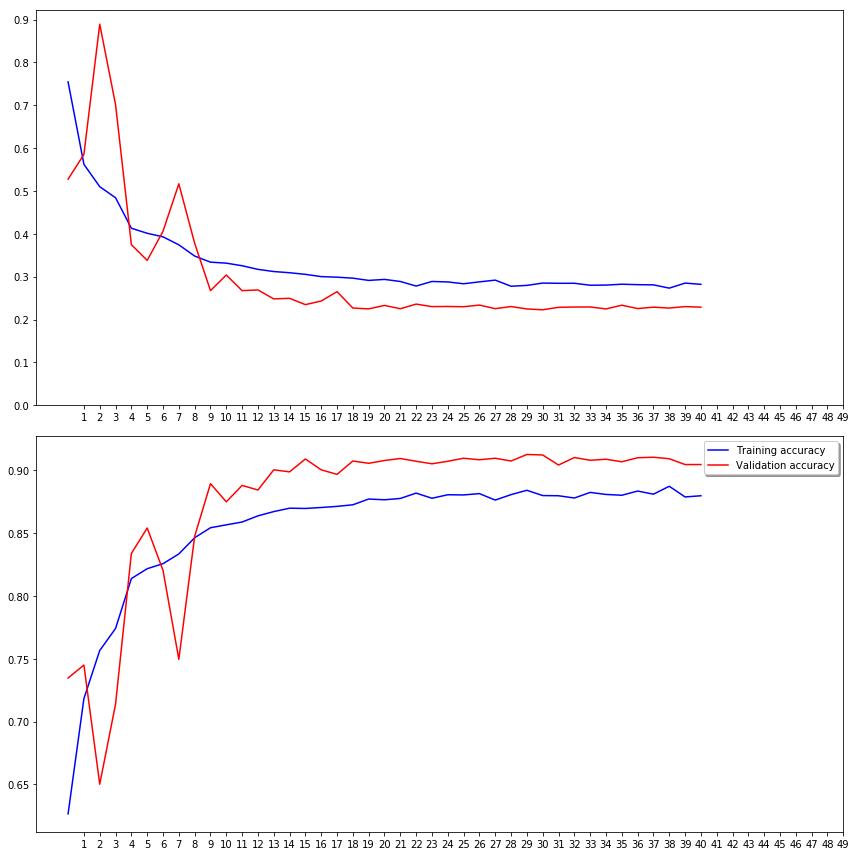

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

TensorBoard

In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from tensorflow.keras.callbacks import TensorBoard
import time

#--------------------------------------------------
NAME = "Cats-vs-dogs"

#--------------------------------------------------
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# BatchNormalization()
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)       

In [0]:
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Transfer-Learning/TransferLearning-classification/logs/{}".format(NAME))

epochs=3 if FAST_RUN else 50
model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[tensorboard]
)

In [0]:
!ls

dataset		  model.h5		      TL-pretrained-models.ipynb
dogs-vs-cats.zip  RM-TL-Classification.ipynb
logs		  sampleSubmission.csv


In [0]:
!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
%load_ext tensorboard

     |████████████████████████████████| 91.3MB 1.3MB/s 
     |████████████████████████████████| 450kB 54.0MB/s 
     |████████████████████████████████| 3.8MB 37.0MB/s 


In [0]:
import os
os.chdir("/content/drive/My Drive/Transfer-Learning/TransferLearning-classification")

%tensorboard --logdir logs


# Pre-trained VGG16 model as a Feature Extractor with Image Augmentation - Finetune 1

lr=2e-5

In [5]:
import os
os.chdir("/content/drive/My Drive/RM")
!ls

 basic_CNN_arc.png				  sampleSubmission.csv
 cats_dogs_cnn_img_aug.h5			  test1
 cats_dogs_tlearn_basicVGG_cnn.h5		  test1.zip
 cats_dogs_tlearn_VGG16_img_aug_cnn.h5		  test_data
 cats_dogs_tlearn_VGG19_img_aug_cnn.h5		  train
'Ch05 - Unleash the Power of Transfer Learning'   training_data
 kaggle.json					  train.zip
 logs						  utils.py
 model_evaluation_utils.py			  validation_data
 __pycache__					  VGG16_basic_arc.png
 researchmethod_classification.ipynb		  VGG19_basic_arc.png


In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline 

Using TensorFlow backend.


In [7]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [11]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['dog', 'dog', 'dog', 'dog', 'dog'] [1 1 1 1 1]


In [12]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
          input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()





58892288/58889256 [==============================] - 2s 0us/step


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________

In [47]:
!ls

 basic_CNN_arc.png
 cats_dogs_cnn_img_aug.h5
 cats_dogs_tlearn_basicVGG_cnn.h5
 cats_dogs_tlearn_VGG16_Finetune_1.h5
 cats_dogs_tlearn_VGG16_Finetune_2.h5
 cats_dogs_tlearn_VGG16_img_aug_cnn.h5
 cats_dogs_tlearn_VGG19_Finetune_1.h5
 cats_dogs_tlearn_VGG19_Finetune_2.h5
 cats_dogs_tlearn_VGG19_img_aug_cnn.h5
'Ch05 - Unleash the Power of Transfer Learning'
 kaggle.json
 logs
 model_evaluation_utils.py
 __pycache__
 researchmethod_classification.ipynb
 sampleSubmission.csv
 test1
 test1.zip
 test_data
 train
 training_data
 train.zip
 utils.py
 validation_data
 VGG16_basic_arc.png
 VGG19_basic_arc.png


In [13]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>]


In [15]:
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f451b441c50>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f452304e9e8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f452304e550>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f451b40c780>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f451b40c6d8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f451abc1e48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f451abd3780>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f451abd38d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f451ab7f5c0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f451ab985f8>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg16-model-Finetune1-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [19]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 41s 407ms/step - loss: 0.6379 - acc: 0.6270 - val_loss: 0.4118 - val_acc: 0.8440
Epoch 2/100
100/100 [==============================] - 33s 328ms/step - loss: 0.4643 - acc: 0.7793 - val_loss: 0.2728 - val_acc: 0.8930
Epoch 3/100
100/100 [==============================] - 33s 329ms/step - loss: 0.4007 - acc: 0.8173 - val_loss: 0.2315 - val_acc: 0.9030
Epoch 4/100
100/100 [==============================] - 33s 328ms/step - loss: 0.3412 - acc: 0.8480 - val_loss: 0.2037 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3295 - acc: 0.8527 - val_loss: 0.1934 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3022 - acc: 0.8733 - val_loss: 0.1788 - val_acc: 0.9250
Epoch 7/100
100/100 [==============================] - 33s 328ms/step - loss: 0.2858 - acc: 0.8753 - val_loss: 0.1981 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

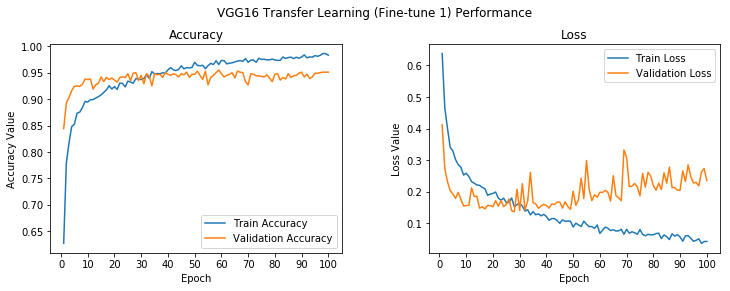

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Transfer Learning (Fine-tune 1) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG16_Finetune_1.h5')

# VGG16 - Fine Tune 2

In [22]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>, <tf.Variable 'block4_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv3/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>]


In [23]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f451b441c50>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f452304e9e8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f452304e550>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f451b40c780>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f451b40c6d8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f451abc1e48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f451abd3780>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f451abd38d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f451ab7f5c0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f451ab985f8>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg16-model-Finetune2-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [27]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 42s 420ms/step - loss: 0.3139 - acc: 0.8627 - val_loss: 0.2482 - val_acc: 0.9020
Epoch 2/100
100/100 [==============================] - 40s 399ms/step - loss: 0.1829 - acc: 0.9253 - val_loss: 0.1529 - val_acc: 0.9440
Epoch 3/100
100/100 [==============================] - 40s 399ms/step - loss: 0.1404 - acc: 0.9417 - val_loss: 0.1856 - val_acc: 0.9400
Epoch 4/100
100/100 [==============================] - 40s 399ms/step - loss: 0.1237 - acc: 0.9487 - val_loss: 0.1305 - val_acc: 0.9570
Epoch 5/100
100/100 [==============================] - 40s 399ms/step - loss: 0.1107 - acc: 0.9573 - val_loss: 0.1369 - val_acc: 0.9560
Epoch 6/100
100/100 [==============================] - 40s 399ms/step - loss: 0.1001 - acc: 0.9580 - val_loss: 0.1461 - val_acc: 0.9500
Epoch 7/100
100/100 [==============================] - 40s 398ms/step - loss: 0.0903 - acc: 0.9640 - val_loss: 0.1929 - val_acc: 0.9480
Epoch 8/100
100/100 [===========================

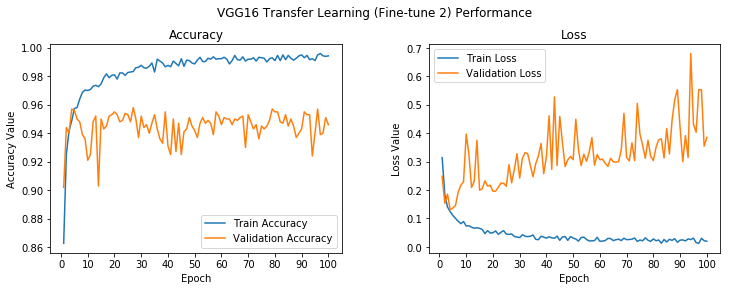

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Transfer Learning (Fine-tune 2) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG16_Finetune_2.h5')

# VGG19-Fine Tune 1

In [30]:
from keras.applications import vgg19
from keras.models import Model
import keras

vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
          input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
____________________________________________________________

In [31]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block5_conv1_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv3_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv4/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv4/bias:0' shape=(512,) dtype=float32_ref>]


In [32]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f45106ae0b8>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7f45108d13c8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f45108d10b8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f45108d16a0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f45108c3d30>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f451089c1d0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f451089ca58>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f45108b80b8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f4510551278>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f4510565a90>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              20024384  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 24,482,369
Trainable params: 13,897,217
Non-trainable params: 10,585,152
_________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg19-model-Finetune1-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [36]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 41s 410ms/step - loss: 0.6185 - acc: 0.6567 - val_loss: 0.4101 - val_acc: 0.8180
Epoch 2/100
100/100 [==============================] - 39s 394ms/step - loss: 0.4566 - acc: 0.7860 - val_loss: 0.2941 - val_acc: 0.8680
Epoch 3/100
100/100 [==============================] - 39s 394ms/step - loss: 0.3823 - acc: 0.8310 - val_loss: 0.3510 - val_acc: 0.8590
Epoch 4/100
100/100 [==============================] - 39s 394ms/step - loss: 0.3538 - acc: 0.8443 - val_loss: 0.2641 - val_acc: 0.8930
Epoch 5/100
100/100 [==============================] - 39s 394ms/step - loss: 0.3375 - acc: 0.8527 - val_loss: 0.2206 - val_acc: 0.9080
Epoch 6/100
100/100 [==============================] - 39s 394ms/step - loss: 0.2973 - acc: 0.8687 - val_loss: 0.2321 - val_acc: 0.9040
Epoch 7/100
100/100 [==============================] - 39s 394ms/step - loss: 0.2790 - acc: 0.8813 - val_loss: 0.2194 - val_acc: 0.9100
Epoch 8/100
100/100 [===========================

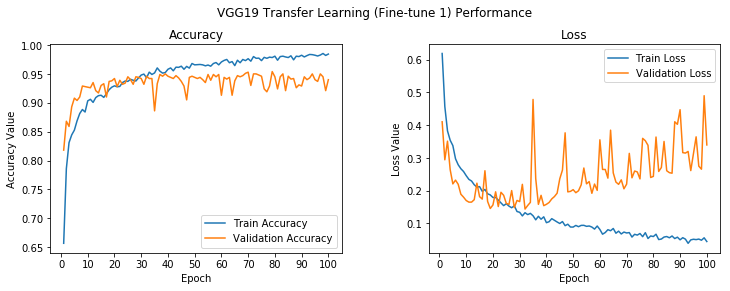

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 Transfer Learning (Fine-tune 1) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG19_Finetune_1.h5')

# VGG19 - Fine Tune 2

In [39]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1_1/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>, <tf.Variable 'block4_conv1_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv2_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv2_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv3_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv3_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv4/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv4/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv1_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2_1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2_1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3_1/kernel:0' shape=(3, 3, 512, 512) dtype=float

In [40]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f45106ae0b8>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7f45108d13c8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f45108d10b8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f45108d16a0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f45108c3d30>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f451089c1d0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f451089ca58>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f45108b80b8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f4510551278>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f4510565a90>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [42]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              20024384  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 24,482,369
Trainable params: 22,156,801
Non-trainable params: 2,325,568
__________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg19-model-Finetune2-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [44]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 52s 516ms/step - loss: 0.2593 - acc: 0.8917 - val_loss: 0.1570 - val_acc: 0.9380
Epoch 2/100
100/100 [==============================] - 50s 496ms/step - loss: 0.1386 - acc: 0.9443 - val_loss: 0.2056 - val_acc: 0.9340
Epoch 3/100
100/100 [==============================] - 50s 496ms/step - loss: 0.1092 - acc: 0.9620 - val_loss: 0.1974 - val_acc: 0.9430
Epoch 4/100
100/100 [==============================] - 50s 495ms/step - loss: 0.1183 - acc: 0.9523 - val_loss: 0.1689 - val_acc: 0.9420
Epoch 5/100
100/100 [==============================] - 49s 495ms/step - loss: 0.0909 - acc: 0.9663 - val_loss: 0.2772 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 50s 495ms/step - loss: 0.0950 - acc: 0.9640 - val_loss: 0.1696 - val_acc: 0.9420
Epoch 7/100
100/100 [==============================] - 50s 495ms/step - loss: 0.0749 - acc: 0.9743 - val_loss: 0.2358 - val_acc: 0.9380
Epoch 8/100
100/100 [===========================

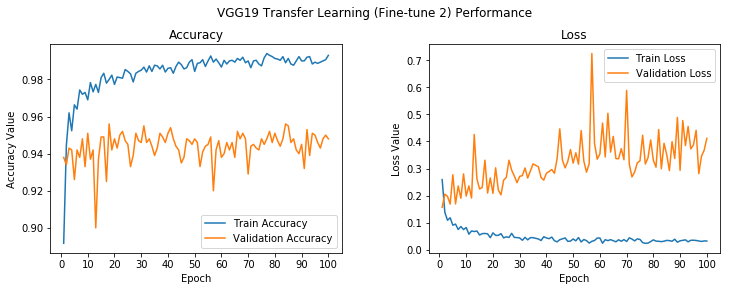

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 Transfer Learning (Fine-tune 2) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG19_Finetune_2.h5')

In [48]:
!ls

 basic_CNN_arc.png
 cats_dogs_cnn_img_aug.h5
 cats_dogs_tlearn_basicVGG_cnn.h5
 cats_dogs_tlearn_VGG16_Finetune_1.h5
 cats_dogs_tlearn_VGG16_Finetune_2.h5
 cats_dogs_tlearn_VGG16_img_aug_cnn.h5
 cats_dogs_tlearn_VGG19_Finetune_1.h5
 cats_dogs_tlearn_VGG19_Finetune_2.h5
 cats_dogs_tlearn_VGG19_img_aug_cnn.h5
'Ch05 - Unleash the Power of Transfer Learning'
 kaggle.json
 logs
 model_evaluation_utils.py
 __pycache__
 researchmethod_classification.ipynb
 sampleSubmission.csv
 test1
 test1.zip
 test_data
 train
 training_data
 train.zip
 utils.py
 validation_data
 VGG16_basic_arc.png
 VGG19_basic_arc.png


# Fogot section

In [0]:
import os
os.chdir("/content/drive/My Drive/RM")
%tensorboard --logdir logs

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [0]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
train_time = datetime.datetime.now().strftime("%m%d%H%M%S")
NAME = "Catdog-vgg16-model-FreezeBase-Augmentation-{}".format(train_time)
#--------------------------------------------------
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM/logs/{}".format(NAME))

In [0]:
history = model.fit_generator(train_generator, 
                steps_per_epoch=100, epochs=100,
                validation_data=val_generator, validation_steps=50, verbose=1,
                callbacks=[tensorboard])

Epoch 1/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6625 - acc: 0.5980 - val_loss: 0.5117 - val_acc: 0.7970
Epoch 2/100
100/100 [==============================] - 29s 294ms/step - loss: 0.5623 - acc: 0.7057 - val_loss: 0.4229 - val_acc: 0.8380
Epoch 3/100
100/100 [==============================] - 29s 292ms/step - loss: 0.5140 - acc: 0.7483 - val_loss: 0.3637 - val_acc: 0.8490
Epoch 4/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4768 - acc: 0.7737 - val_loss: 0.3262 - val_acc: 0.8780
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4577 - acc: 0.7853 - val_loss: 0.3058 - val_acc: 0.8840
Epoch 6/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4333 - acc: 0.8090 - val_loss: 0.2963 - val_acc: 0.8850
Epoch 7/100
100/100 [==============================] - 29s 292ms/step - loss: 0.4256 - acc: 0.8077 - val_loss: 0.2830 - val_acc: 0.8900
Epoch 8/100
100/100 [===========================

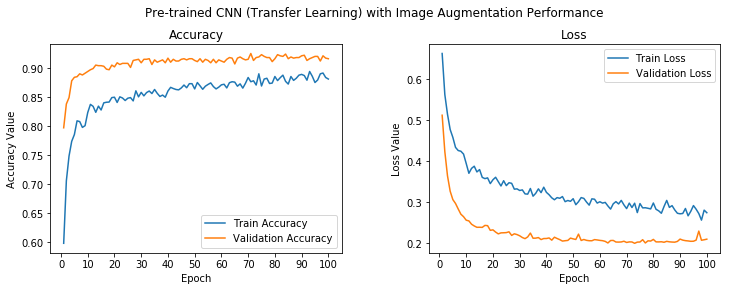

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_VGG16_img_aug_cnn.h5')

# Tensorboard display

In [49]:
!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
%load_ext tensorboard

     |████████████████████████████████| 95.2MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 34.5MB/s 
     |████████████████████████████████| 450kB 43.1MB/s 


In [0]:
import os
os.chdir("/content/drive/My Drive/RM")
%tensorboard --logdir logs

# Evaluation Models

In [0]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
customised_cnn = load_model('cats_dogs_cnn_img_aug.h5')
VGG16_basic = load_model('cats_dogs_tlearn_VGG16_img_aug_cnn.h5')
VGG16_FT1 = load_model('cats_dogs_tlearn_VGG16_Finetune_1.h5')
VGG16_FT2 = load_model('cats_dogs_tlearn_VGG16_Finetune_2.h5')
VGG19_basic = load_model('cats_dogs_tlearn_VGG19_img_aug_cnn.h5')
VGG19_FT1 = load_model('cats_dogs_tlearn_VGG19_Finetune_1.h5')
VGG19_FT2 = load_model('cats_dogs_tlearn_VGG19_Finetune_2.h5')


# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [55]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


Customised CNN

In [56]:
predictions = customised_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.797
Precision: 0.8314
Recall: 0.797
F1 Score: 0.7916

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.72      0.96      0.83       500
         cat       0.94      0.64      0.76       500

    accuracy                           0.80      1000
   macro avg       0.83      0.80      0.79      1000
weighted avg       0.83      0.80      0.79      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  479        21 
        cat  182        318


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


Basic VGG16

In [57]:
predictions = VGG16_basic.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.912
Precision: 0.9135
Recall: 0.912
F1 Score: 0.9119

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.94      0.88      0.91       500
         cat       0.89      0.94      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  441        59 
        cat  29         471


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


VGG16 FT 1

In [58]:
predictions = VGG16_FT1.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.954
Precision: 0.954
Recall: 0.954
F1 Score: 0.954

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.95      0.95      0.95       500
         cat       0.95      0.95      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  477        23 
        cat  23         477


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


VGG16 FT2

In [59]:
predictions = VGG16_FT2.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.96      0.96      0.96       500
         cat       0.96      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  482        18 
        cat  22         478


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


VGG19 Basic

In [60]:
predictions = VGG19_basic.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.886
Precision: 0.889
Recall: 0.886
F1 Score: 0.8858

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.85      0.93      0.89       500
         cat       0.92      0.84      0.88       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  465        35 
        cat  79         421


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


VGG19 FT1

In [61]:
predictions = VGG19_FT1.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.946
Precision: 0.9465
Recall: 0.946
F1 Score: 0.946

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.93      0.96      0.95       500
         cat       0.96      0.93      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  481        19 
        cat  35         465


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


VGG19 FT2

In [62]:
predictions = VGG19_FT2.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.96      0.96      0.96       500
         cat       0.96      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  480        20 
        cat  20         480


/content/drive/My Drive/RM/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/drive/My Drive/RM/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))
